<a href="https://colab.research.google.com/github/suchandra1523/NAGA_SUCHANDRA_TIRUMALASETTI_INFO_5731/blob/main/Tirumalasetti_NagaSuchandra_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
import pandas as pd
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

import matplotlib.pyplot as plt
from gensim.models import LsiModel
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
df = pd.read_csv('/content/sentiment_analysis_results (1).csv')

In [ ]:
df = df.drop_duplicates(ignore_index=True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,document_id,Cleaned Reviews,sentiment
0,1,one anticip film year mani peopl includ oppenh...,positive
1,2,youll wit brain fulli switch watch oppenheim c...,positive
2,3,im big fan nolan work realli look forward unde...,positive
3,4,oppenheim biograph thriller film written direc...,positive
4,5,movi wow dont think ever felt like watch movi ...,positive
...,...,...,...
995,996,movi potenti ultim crash iceberg sank abyss he...,negative
996,997,im go honest high expect film gripe adapt onel...,positive
997,998,came back screen must say wasnt impressedth fi...,negative
998,999,first pattinson cant pull incognito mode mr ba...,negative


In [ ]:

stop_words = set(stopwords.words('english'))
digits_to_remove = {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

def text_manipulation(text):
    # Text preprocessing
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    filtered_tokens = [word for word in filtered_tokens if word not in stop_words]  # Remove stop words

    # Remove digits and clean up words
    cleaned_tokens = []
    for word in filtered_tokens:
        if word.isdigit():
            continue

        if any(char in digits_to_remove for char in word):
            cleaned_word = ''.join(char for char in word if char not in digits_to_remove)
            cleaned_tokens.append(cleaned_word)
        else:
            cleaned_tokens.append(word)


    final_tokens = [word for word in cleaned_tokens if len(word) >= 3]

    return final_tokens


df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(text_manipulation)


print(df['Cleaned Reviews'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [one, anticip, film, year, mani, peopl, includ...
1      [youll, wit, brain, fulli, switch, watch, oppe...
2      [big, fan, nolan, work, realli, look, forward,...
3      [oppenheim, biograph, thriller, film, written,...
4      [movi, wow, dont, think, ever, felt, like, wat...
                             ...                        
995    [movi, potenti, ultim, crash, iceberg, sank, a...
996    [honest, high, expect, film, gripe, adapt, one...
997    [came, back, screen, must, say, wasnt, impress...
998    [first, pattinson, cant, pull, incognito, mode...
999    [surpris, honestli, great, stori, unbeliev, ac...
Name: Cleaned Reviews, Length: 1000, dtype: object


In [ ]:
vocabulary = list()
for word_list in df['Cleaned Reviews']: #for loop for getting the count of each words
   vocabulary.append(word_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
id2word = corpora.Dictionary(list(vocabulary))

# Create Corpus
texts = vocabulary

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 9), (45, 1), (46, 5), (47, 1), (48, 2), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 4), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 5), (68, 1), (69, 2), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 6), (86, 4), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 2), (110, 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    c_v = []
    m_l = []
    for k in range(start, limit, step):
        model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics= k,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        m_l.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(coherencemodel.get_coherence())

    return m_l, c_v

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


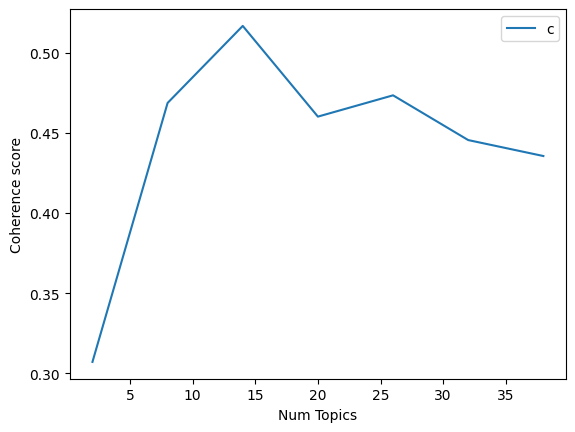

In [ ]:
m_l, c_v = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=vocabulary, start=2, limit=40, step=6)
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
import nltk
nltk.download('wordnet')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from pprint import pprint



# Train LDA model
num_topics = 10  # Number of topics
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print top 10 clusters for topic modeling
print("Top 10 clusters for topic modeling:")
pprint(lda_model.print_topics(num_words=5))

# Summarize and describe topics for each cluster
topic_summary = {}
for topic_idx, topic in lda_model.print_topics():
    words = [word.split('*')[1].strip().strip('"') for word in topic.split('+')]
    topic_summary[topic_idx] = words

print("\nSummarized Topics:")
for idx, words in topic_summary.items():
    print(f"Topic {idx}: {' '.join(words)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top 10 clusters for topic modeling:
[(0,
  '0.031*"batman" + 0.022*"movi" + 0.016*"like" + 0.010*"good" + '
  '0.007*"charact"'),
 (1,
  '0.039*"movi" + 0.019*"batman" + 0.016*"like" + 0.012*"film" + 0.011*"good"'),
 (2,
  '0.012*"batman" + 0.011*"movi" + 0.010*"film" + 0.009*"dark" + 0.006*"see"'),
 (3,
  '0.024*"film" + 0.012*"batman" + 0.007*"even" + 0.006*"like" + '
  '0.006*"charact"'),
 (4,
  '0.031*"batman" + 0.020*"movi" + 0.018*"film" + 0.008*"dark" + 0.007*"like"'),
 (5,
  '0.033*"batman" + 0.012*"film" + 0.011*"movi" + 0.008*"like" + '
  '0.006*"charact"'),
 (6,
  '0.033*"batman" + 0.030*"movi" + 0.010*"like" + 0.009*"dark" + '
  '0.008*"charact"'),
 (7,
  '0.026*"batman" + 0.022*"movi" + 0.010*"dark" + 0.006*"film" + 0.005*"go"'),
 (8,
  '0.022*"batman" + 0.016*"movi" + 0.013*"film" + 0.012*"like" + 0.008*"one"'),
 (9,
  '0.023*"batman" + 0.013*"film" + 0.010*"movi" + 0.008*"like" + 0.008*"dark"')]

Summarized Topics:
Topic 0: batman movi like good charact riddler even watc

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [3]:

stop_words = set(stopwords.words('english'))
digits_to_remove = {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

def text_manipulation(text):
    # Text preprocessing
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    filtered_tokens = [word for word in filtered_tokens if word not in stop_words]  # Remove stop words

    # Remove digits and clean up words
    cleaned_tokens = []
    for word in filtered_tokens:
        if word.isdigit():
            continue

        if any(char in digits_to_remove for char in word):
            cleaned_word = ''.join(char for char in word if char not in digits_to_remove)
            cleaned_tokens.append(cleaned_word)
        else:
            cleaned_tokens.append(word)


    final_tokens = [word for word in cleaned_tokens if len(word) >= 3]

    return final_tokens


df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(text_manipulation)


print(df['Cleaned Reviews'])


0      [one, anticip, film, year, mani, peopl, includ...
1      [youll, wit, brain, fulli, switch, watch, oppe...
2      [big, fan, nolan, work, realli, look, forward,...
3      [oppenheim, biograph, thriller, film, written,...
4      [movi, wow, dont, think, ever, felt, like, wat...
                             ...                        
995    [movi, potenti, ultim, crash, iceberg, sank, a...
996    [honest, high, expect, film, gripe, adapt, one...
997    [came, back, screen, must, say, wasnt, impress...
998    [first, pattinson, cant, pull, incognito, mode...
999    [surpris, honestli, great, stori, unbeliev, ac...
Name: Cleaned Reviews, Length: 1000, dtype: object


In [4]:
vocabulary = Counter()
for word_list in df['Cleaned Reviews']:
    for word in word_list:
        vocabulary[word] += 1



In [ ]:
top_100 = {k: v for k, v in sorted(vocabulary.items(), key=lambda item: item[1], reverse=True)}
top_100 = {k:vocabulary[k] for k in list(top_100.keys())[:100]}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
features = list(top_100.keys())
features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['batman',
 'movi',
 'film',
 'like',
 'one',
 'good',
 'charact',
 'dark',
 'scene',
 'realli',
 'time',
 'even',
 'make',
 'stori',
 'watch',
 'riddler',
 'long',
 'pattinson',
 'get',
 'much',
 'great',
 'look',
 'hour',
 'see',
 'bruce',
 'feel',
 'would',
 'also',
 'wayn',
 'dont',
 'way',
 'could',
 'think',
 'bore',
 'robert',
 'action',
 'bad',
 'thing',
 'end',
 'well',
 'tri',
 'act',
 'didnt',
 'mani',
 'gotham',
 'nolan',
 'better',
 'take',
 'best',
 'actor',
 'made',
 'catwoman',
 'peopl',
 'work',
 'detect',
 'doesnt',
 'seem',
 'know',
 'penguin',
 'say',
 'noth',
 'comic',
 'reev',
 'still',
 'give',
 'love',
 'first',
 'play',
 'want',
 'seen',
 'plot',
 'need',
 'never',
 'cast',
 'lot',
 'come',
 'slow',
 'someth',
 'new',
 'villain',
 'citi',
 'knight',
 'actual',
 'year',
 'felt',
 'point',
 'superhero',
 'role',
 'dano',
 'kravitz',
 'everi',
 'ever',
 'fight',
 'littl',
 'use',
 'enough',
 'show',
 'interest',
 'wasnt',
 'fan']

We have selected 100 features as they have the highest word counts

In [ ]:
# Write your code here


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold


# Split dataset into training (80%) and testing (20%)
X = df['Cleaned Reviews']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Function to evaluate model performance using cross-validation
def evaluate_model(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X, y, cv=cv, scoring='precision_macro')
    recall_scores = cross_val_score(model, X, y, cv=cv, scoring='recall_macro')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')

    print("Mean Accuracy:", accuracy_scores.mean())
    print("Mean Precision:", precision_scores.mean())
    print("Mean Recall:", recall_scores.mean())
    print("Mean F1-score:", f1_scores.mean())

# Logistic Regression Classifier
logreg_model = LogisticRegression(max_iter=1000)
logreg_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', logreg_model)])
print("\nLogistic Regression Performance:")
evaluate_model(logreg_pipeline, X, y)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', rf_model)])
print("\nRandom Forest Performance:")
evaluate_model(rf_pipeline, X, y)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Logistic Regression Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Mean Accuracy: 0.783
Mean Precision: 0.5956640078329485
Mean Recall: 0.48896934418221266
Mean F1-score: 0.49986252084131966

Random Forest Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Mean Accuracy: 0.7709999999999999
Mean Precision: 0.6008546544184987
Mean Recall: 0.46698704393555646
Mean F1-score: 0.47157426648766


**Selection of the Best Model:**
From the performance metrics,Logistic Regression model tends to have slightly higher accuracy and F1-score.









# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
import pandas as pd
train_data=pd.read_csv("/content/train.csv")
train_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
test_data=pd.read_csv("/content/test.csv")
test_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
col=list(train_data.columns)
col

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [ ]:
train_data['SalePrice'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
s = list()
for i in list(train_data.columns):
    if(train_data[i].dtypes == 'object'):
        s.append(i)
s.append('Id')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train_data = train_data.drop(s, axis = 1)
train_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
train_data=train_data.dropna()
train_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
correlate = train_data.corr()
correlate["SalePrice"].sort_values(ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SalePrice        1.000000
OverallQual      0.797881
GrLivArea        0.705154
GarageCars       0.647034
GarageArea       0.619330
TotalBsmtSF      0.615612
1stFlrSF         0.607969
FullBath         0.566627
TotRmsAbvGrd     0.547067
YearBuilt        0.525394
YearRemodAdd     0.521253
GarageYrBlt      0.504753
MasVnrArea       0.488658
Fireplaces       0.461873
BsmtFinSF1       0.390301
LotFrontage      0.344270
OpenPorchSF      0.343354
WoodDeckSF       0.336855
2ndFlrSF         0.306879
LotArea          0.299962
HalfBath         0.268560
BsmtFullBath     0.236737
BsmtUnfSF        0.213129
BedroomAbvGr     0.166814
ScreenPorch      0.110427
PoolArea         0.092488
MoSold           0.051568
3SsnPorch        0.030777
LowQualFinSF    -0.001482
YrSold          -0.011869
BsmtFinSF2      -0.028021
MiscVal         -0.036041
BsmtHalfBath    -0.036513
MSSubClass      -0.088032
OverallCond     -0.124391
KitchenAbvGr    -0.140497
EnclosedPorch   -0.154843
Name: SalePrice, dtype: float64

from the above we can say that OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF are related to saleprice

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


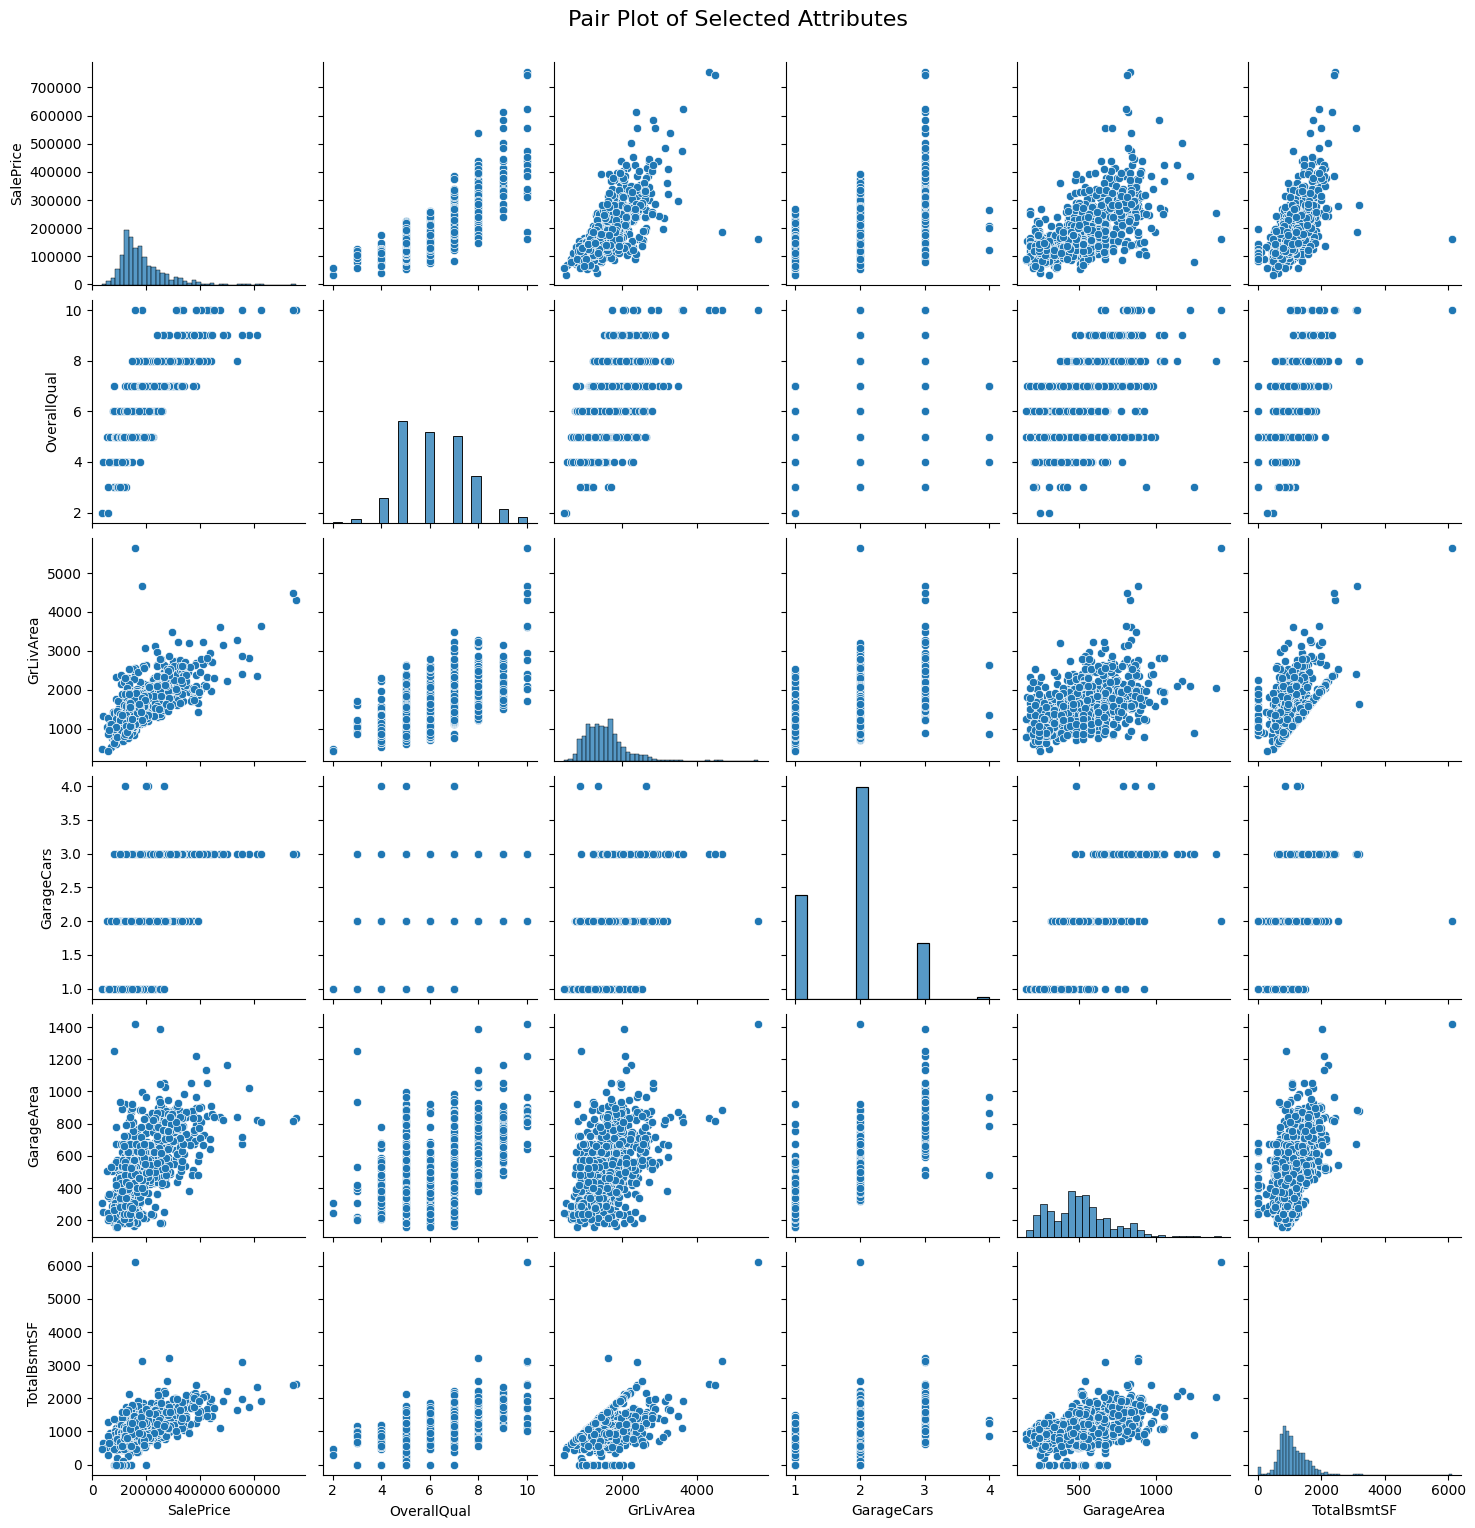

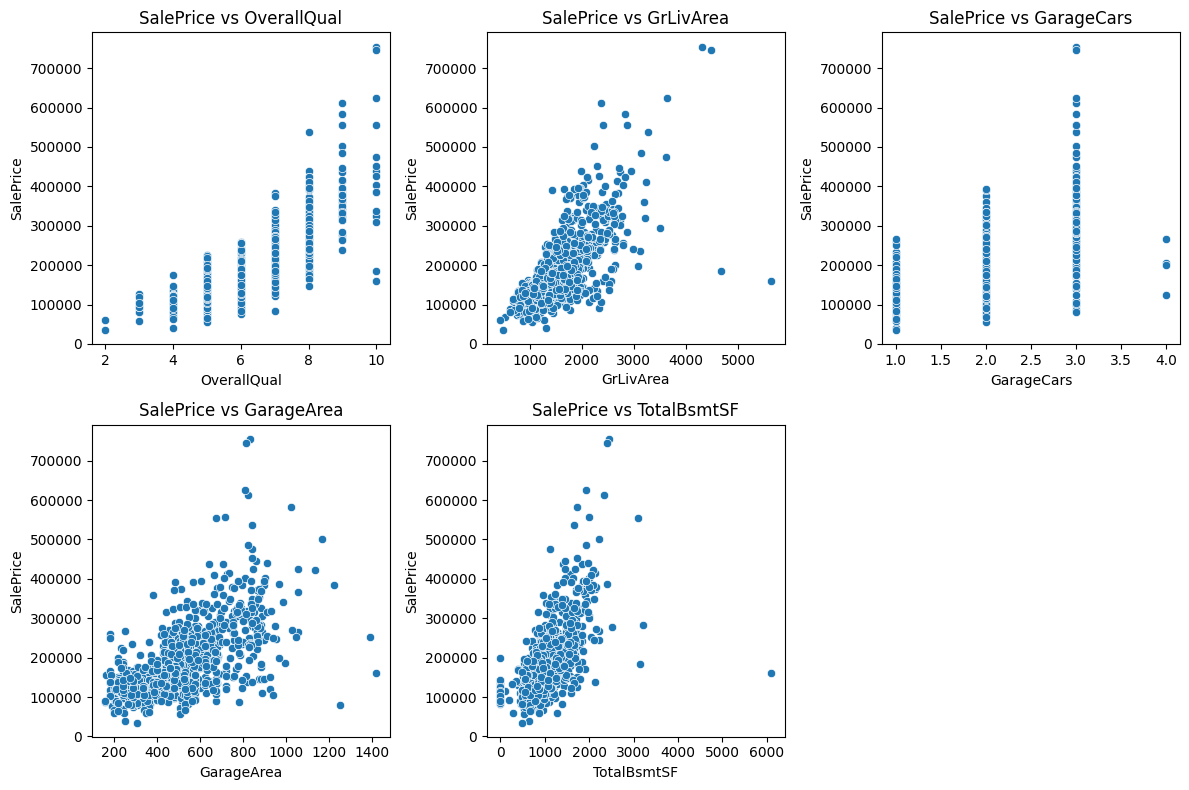

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]

# Plot pair plots using seaborn
sns.pairplot(train_data[attributes])
plt.suptitle("Pair Plot of Selected Attributes", y=1.02, size=16)
plt.show()

# Individual scatter plots for SalePrice vs. other attributes
plt.figure(figsize=(12, 8))
for i, attr in enumerate(attributes[1:], start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=attr, y="SalePrice", data=train_data)
    plt.title(f"SalePrice vs {attr}")
    plt.tight_layout()

plt.show()



In [ ]:
# Preparing data for training and testing (in training Dataset)
y = np.log(train_data.SalePrice)
X = train_data.drop(['SalePrice'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1121, 36)
Shape of y: (1121,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
reg = linear_model.LinearRegression()
model = reg.fit(X_train, y_train)
print('LinearRegression R squared:', model.score(X_test, y_test))

LinearRegression R squared: 0.8723456211866101


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pred = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, pred))


RMSE: 0.018150362545458185


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


since the RMSEscore is low our model is a good model

In [ ]:
import pandas as pd
import numpy as np

# Select numeric features from test dataset and handle missing values (interpolation)
test_data_numeric = test_data.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

# Make predictions using the trained model
predictions = model.predict(test_data_numeric)
final_predictions = np.exp(predictions)

# Create a DataFrame to store predictions along with corresponding Ids
df_prediction = pd.DataFrame()
df_prediction['Id'] = test_data['Id']
df_prediction['SalePrice'] = final_predictions

# Save predictions to a CSV file
df_prediction.to_csv('HouseSalePrice_predictions.csv', index=False)

# Display the DataFrame containing Ids and predicted SalePrice
print(df_prediction)


        Id      SalePrice
0     1461  118460.790912
1     1462  130289.188661
2     1463  166398.569018
3     1464  195224.201247
4     1465  183912.025032
...    ...            ...
1454  2915   93050.418652
1455  2916   92673.222432
1456  2917  175428.900790
1457  2918  109103.180101
1458  2919  238938.338909

[1459 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
!pip install transformers pandas scikit-learn


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset and preprocess it
df = pd.read_csv('/content/sentiment_analysis_results (1).csv')
df['sentiment'] = df['sentiment'].str.lower()
data_subset = df.head(15).copy()

# Initializing the zero-shot classification model
sentiment_classifier = pipeline("zero-shot-classification", model="xlm-Roberta-large")  # Loading the BART model pre-trained on MNLI

# Defining labels and perform sentiment analysis
labels = ["positive", "negative", "neutral"]
data_subset['predicted_sentiment'] = data_subset['Cleaned Reviews'].apply(
    lambda x: sentiment_classifier(x, candidate_labels=labels)['labels'][0].lower()
)

# results and displaying the output
data_subset.to_csv('sentiment_predictions.csv', index=False)
print(data_subset[['Cleaned Reviews', 'predicted_sentiment']])
print("Output saved to sentiment_predictions.csv")

# Calculating and displaying evaluation metrics

metrics = {
    'Accuracy': accuracy_score(data_subset['sentiment'], data_subset['predicted_sentiment']),
    'Precision': precision_score(data_subset['sentiment'], data_subset['predicted_sentiment'], average='weighted', zero_division=1),
    'Recall': recall_score(data_subset['sentiment'], data_subset['predicted_sentiment'], average='weighted', zero_division=1),
    'F1 Score': f1_score(data_subset['sentiment'], data_subset['predicted_sentiment'], average='weighted', zero_division=1)
}
# Printing each metric
print("\nMetrics:")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.2f}")

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-Roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


                                      Cleaned Reviews predicted_sentiment
0   one anticip film year mani peopl includ oppenh...            negative
1   youll wit brain fulli switch watch oppenheim c...             neutral
2   im big fan nolan work realli look forward unde...             neutral
3   oppenheim biograph thriller film written direc...            negative
4   movi wow dont think ever felt like watch movi ...            positive
5   familiar manhattan project social polit afterm...            negative
6   im still collect thought experienc film cillia...            negative
7   anyon el find movi hate say bore know know pie...             neutral
8   may consid lucki aliv watch christoph nolan wo...             neutral
9   okay nolan fan get finger poi downvot im say t...             neutral
10  cillian murphi except lead role oscar worthyil...            positive
11  oppenheim might best film watch long long time...            negative
12  film look great brilliantli act th

The `xlm-Roberta-large` model used in the code is a large, multilingual pre-trained language model with over 550 million parameters. It was trained on diverse text sources from multiple languages. The code applies this model for sentiment analysis using zero-shot classification, without task-specific fine-tuning, by framing sentiment prediction as a text classification task. The model's cross-lingual capabilities enable it to understand and generate text in different languages, making it suitable for analyzing sentiment across diverse language datasets.

**advantages:**

Can perform tasks like sentiment analysis without task-specific fine-tuning, reducing annotation effort.Can perform tasks like sentiment analysis without task-specific fine-tuning, reducing annotation effort.

**disadvantages:**

Requires computational power and memory due to its large size.Complex can be difficult to debug.
Implementing and running the model efficiently may require powerful hardware or cloud resources.